In [244]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,cohen_kappa_score
import pandas as pd
from scipy import stats



In [245]:
df = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_3_5point/5-labels-experiment_Boda.csv')
df2 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_3_5point/5-labels-experiment_Tim.csv')
df3 = pd.read_csv('/home/abdelrahman.sadallah/mbzuai/review_rewrite/data/Batch_3_5point/5-labels-experiment_chatgpt.csv')
# df3 = None

In [246]:
column1 = ['human_actionability', 'human_specificity', 'human_verifiability','human_usefulness']


In [247]:
num_rows_with_values = len(df.dropna(subset=column1))
print(num_rows_with_values)
num_rows_with_values = len(df2.dropna(subset=column1))
print(num_rows_with_values)
num_rows_with_values = len(df3.dropna(subset=column1))
print(num_rows_with_values)

60
52
52


In [248]:
df['human_verifiability'] = df['human_verifiability'].replace('NO_CLAIM','0')
df2['human_verifiability'] = df2['human_verifiability'].replace('NO_CLAIM','0')



In [249]:
# ########3 Merge 0 labels with 1
# for col in column1:
#     df[col] = df[col].replace(0, 1).replace('0', 1)
#     df2[col] = df2[col].replace(0, 1).replace('0', 1)
#     df3[col] = df3[col].replace(0, 1).replace('0', 1)

In [254]:
annotator_1 = 'Tim'
annotator_2 = 'ChatGPT'

dfs = {'Tim': df2, 'Boda': df, 'ChatGPT': df3}

In [255]:
columns_to_plot = column1

# Create a dictionary to store the data for each aspect
aspect_data_filtered = {aspect: {annotator_1: [], annotator_2: []} for aspect in columns_to_plot}

# Iterate over each aspect
for aspect in columns_to_plot:

    ## make a mini  combined dataframe with the aspect column from each annotator
    mini_df = pd.concat([dfs[annotator_1][aspect], dfs[annotator_2][aspect]], axis=1).dropna()
    mini_df.columns = [annotator_1, annotator_2]

    print(len(mini_df))

    # ####### consider only examples when the two human annotators agree
    # all_df = pd.concat([dfs['Boda'][aspect], dfs['Tim'][aspect], dfs['ChatGPT'][aspect]], axis=1).dropna()
    # all_df.columns = ['Boda', 'Tim', 'ChatGPT']
    # print(len(all_df))

    # #########################################################333


    ## iterate over rows in all three dataframes
    for i in range(len(mini_df)):
        
        x = mini_df.iloc[i][annotator_1]
        y = mini_df.iloc[i][annotator_2]
        ## Map NO_CLAIM to 0
        if x == 'NO_CLAIM':
            x = '0'
        if y == 'NO_CLAIM':
            y = '0'

        x = str(int(x))
        y = str(int(y))
        
    
        possible_values = ['1', '2', '3', '4', '5']
        if aspect == 'human_verifiability':
            possible_values += ['0']

        # ############################# consider only examples when the two human annotators agree
        # xx = str(int(all_df.iloc[i]['Boda']))
        # yy = str(int(all_df.iloc[i]['Tim']))
        # zz = str(int(all_df.iloc[i]['ChatGPT']))
        # if xx in possible_values and yy in possible_values and zz in possible_values and abs(int(xx) - int(yy)) <= 1:
        #     aspect_data_filtered[aspect][annotator_1].append(yy)
        #     aspect_data_filtered[aspect][annotator_2].append(zz)
        # ############################################################3

        if x in possible_values and y in possible_values:
            aspect_data_filtered[aspect][annotator_1].append(x)
            aspect_data_filtered[aspect][annotator_2].append(y)
    

50
50
51
51
49
49
51
51


In [256]:


for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    # ################# Remove the samples where the annotators disagreement on human_actionability is more than 1 #################
    # ignore_idecies = []
    # if aspect != 'human_actionability':
    #     for i in range(len(aspect_data_filtered['human_actionability'][annotator_1])):
    #         val_1 = aspect_data_filtered['human_actionability'][annotator_1][i]
    #         val_2 = aspect_data_filtered['human_actionability'][annotator_2][i]
    #         if abs(int(val_1) - int(val_2)) > 1:
    #             ignore_idecies.append(i)     
    # assert len(annotator1_data) == len(annotator2_data)
    # annotator1_data = [i for j, i in enumerate(annotator1_data) if j not in ignore_idecies]
    # annotator2_data = [i for j, i in enumerate(annotator2_data) if j not in ignore_idecies]
    # assert len(annotator1_data) == len(annotator2_data)
    # ############################################################################################################




    print(f'Agreement Statistics for {aspect.split("_")[1]}')
    print(f' Total number of samples: {len(annotator1_data)}')
    print(f' F1 Score: {f1_score(annotator1_data,annotator2_data, average="micro"):.2f}')
    print(f' Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data):.2f}')
    print(f' Linear Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="linear"):.2f}')
    print(f' Quadratic Kappa Score: {cohen_kappa_score(annotator1_data, annotator2_data, weights="quadratic"):.2f}')

    res = stats.spearmanr(annotator1_data, annotator2_data)
    print(f' Spearman Correlation: {res.correlation:.2f}')

    print('-' * 50)

print('=' * 50)

Agreement Statistics for actionability
 Total number of samples: 48
 F1 Score: 0.33
 Kappa Score: 0.12
 Linear Kappa Score: 0.30
 Quadratic Kappa Score: 0.46
 Spearman Correlation: 0.59
--------------------------------------------------
Agreement Statistics for specificity
 Total number of samples: 45
 F1 Score: 0.42
 Kappa Score: 0.19
 Linear Kappa Score: 0.24
 Quadratic Kappa Score: 0.30
 Spearman Correlation: 0.31
--------------------------------------------------
Agreement Statistics for verifiability
 Total number of samples: 36
 F1 Score: 0.14
 Kappa Score: -0.01
 Linear Kappa Score: 0.07
 Quadratic Kappa Score: 0.13
 Spearman Correlation: 0.12
--------------------------------------------------
Agreement Statistics for usefulness
 Total number of samples: 45
 F1 Score: 0.31
 Kappa Score: 0.07
 Linear Kappa Score: 0.14
 Quadratic Kappa Score: 0.23
 Spearman Correlation: 0.48
--------------------------------------------------


human_actionability
--------------------------------------------------
human_specificity
--------------------------------------------------
human_verifiability
--------------------------------------------------
human_usefulness
--------------------------------------------------


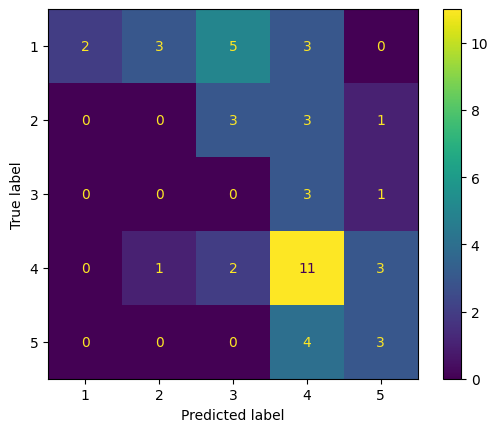

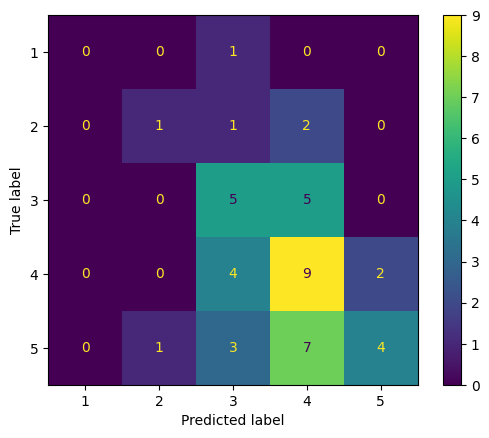

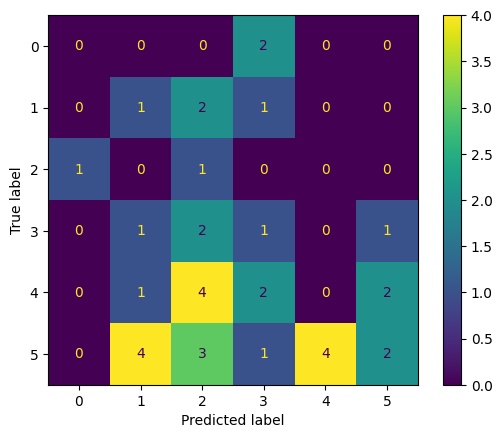

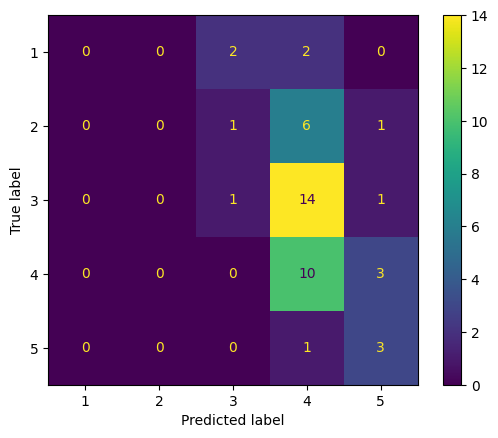

In [257]:
## draw confusion matrix

for aspect in columns_to_plot:
    annotator1_data = aspect_data_filtered[aspect][annotator_1]
    annotator2_data = aspect_data_filtered[aspect][annotator_2]

    if aspect == 'human_verifiability':
        possible_values = ['0','1', '2', '3', '4', '5']
    else:
        possible_values = ['1', '2', '3', '4', '5']
    
    print(aspect)
    cm = confusion_matrix(annotator1_data, annotator2_data, labels=possible_values)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=possible_values)
    disp.plot()
    # print(cm)
    print('-' * 50)


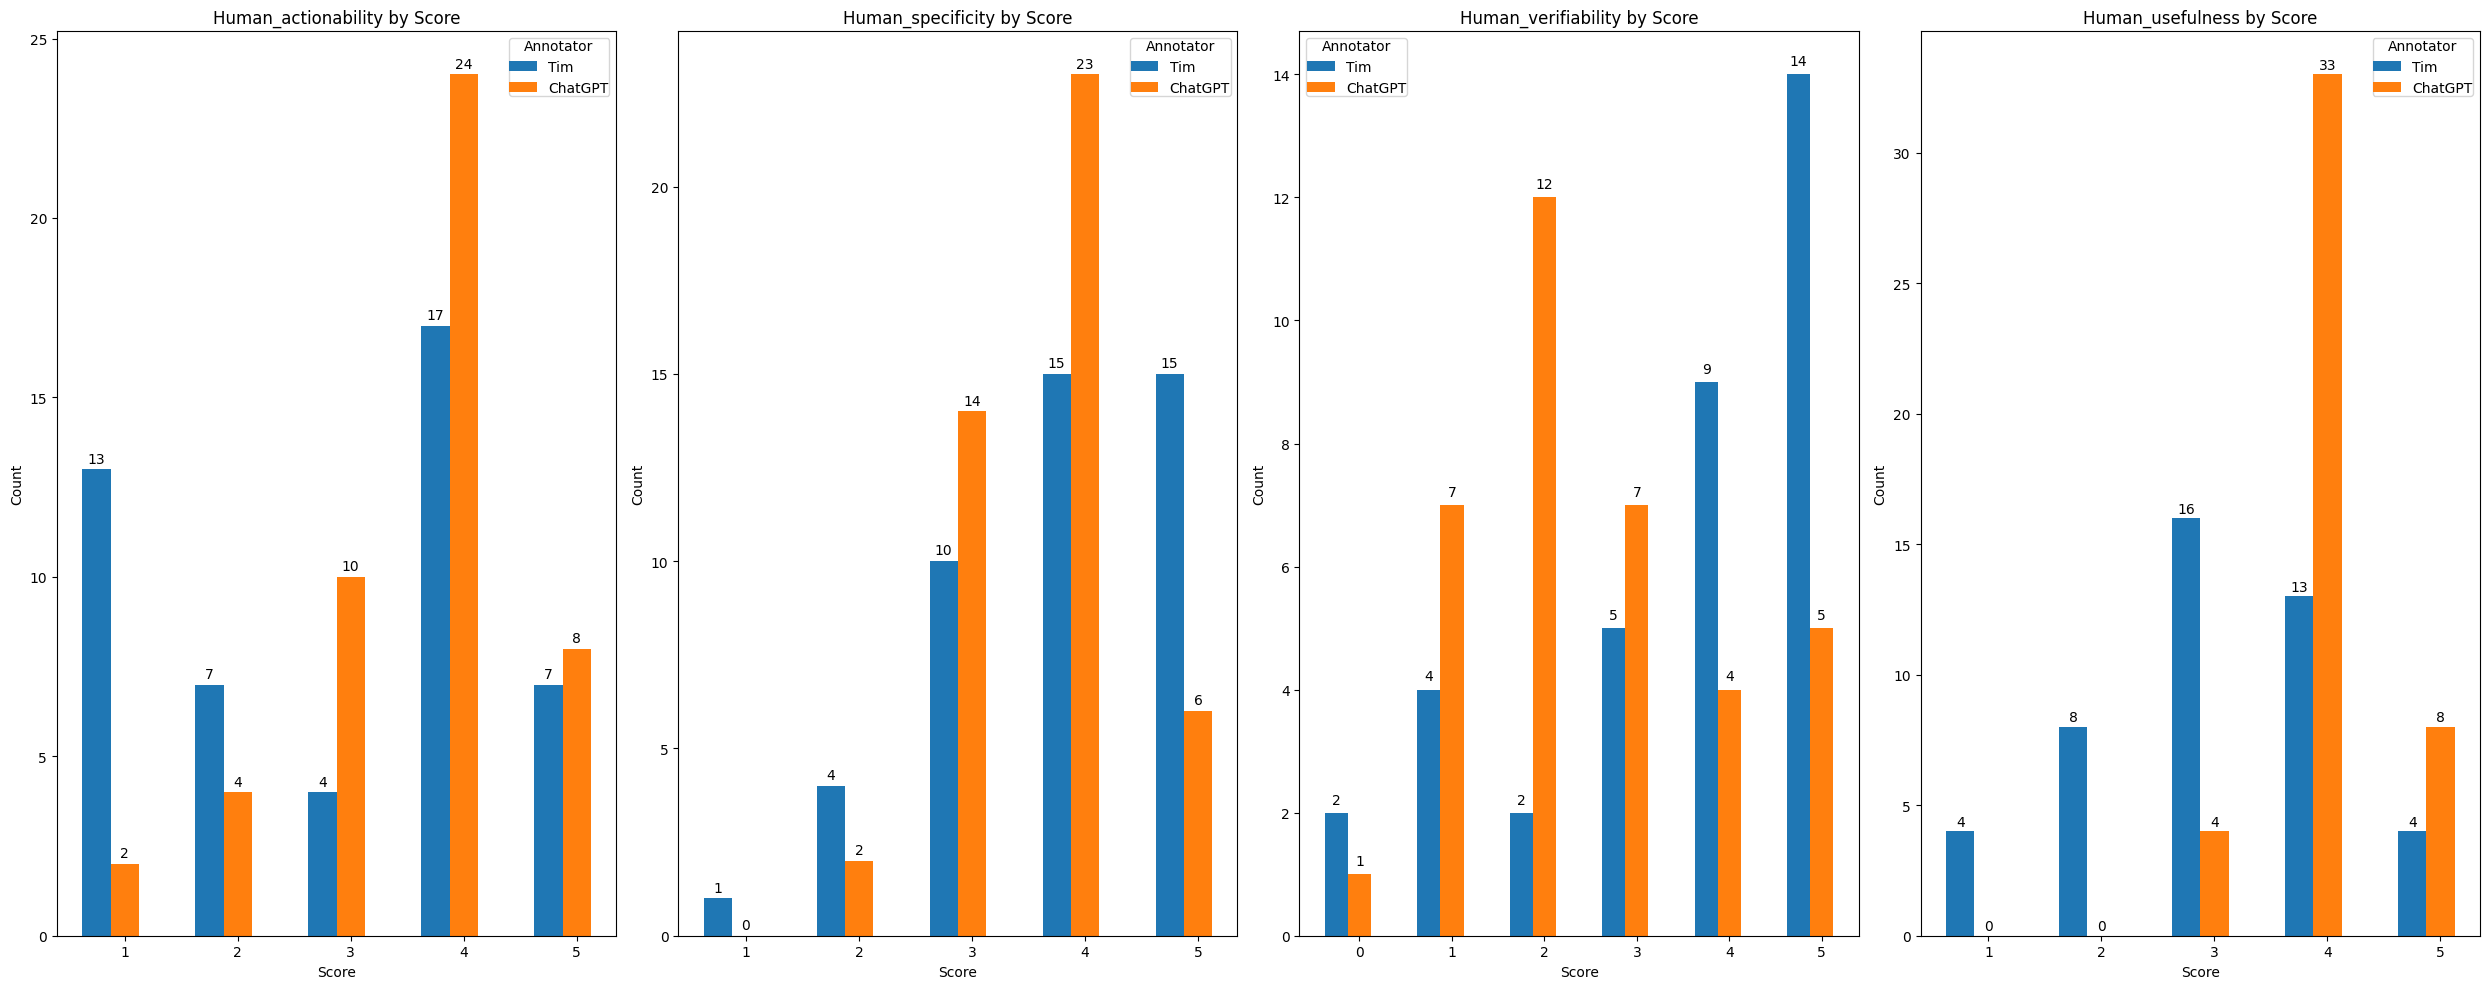

In [258]:
import matplotlib.pyplot as plt
import numpy as np

# Redefine data to fit the updated chart structure
# Data is now organized by scores for each aspect

columns_to_plot = column1
annotators = [annotator_1, annotator_2]
# Create chart with separated scores for each aspect
fig, axes = plt.subplots(1, 4, figsize=(25, 10))

# Define score categories for consistent plotting
# scores = [-1, 0, 1]

for idx, aspect in enumerate(columns_to_plot):
    scores = [ 0, 1, 2, 3, 4, 5] if aspect == 'human_verifiability' else [ 1, 2, 3, 4,5]
    x = np.arange(len(scores))  # Score categories
    ax = axes[idx]
    # Offset position for each annotator
    bar_width = 0.25
    for i, annotator in enumerate(annotators):
        counts = [aspect_data_filtered[aspect][annotator].count(str(score)) for score in scores]
        
        # Plot bars for each annotator
        bars = ax.bar(x + i * bar_width, counts, width=bar_width, label=annotator)
        
        # Annotate each bar with the count value
        for bar in bars:
            yval = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.1,  # Adjust this value for placement above bars
                int(yval), 
                ha='center', 
                va='bottom'
            )

    ax.set_title(f'{aspect.capitalize()} by Score')
    ax.set_xlabel('Score')
    ax.set_ylabel('Count')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(scores)
    ax.legend(title='Annotator', borderpad=0.05)

plt.tight_layout()
plt.show()
